<a href="https://colab.research.google.com/github/Sinha-Sagar/NIT_Patna_Load_Forecasting/blob/main/NIT_Patna_Load_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Library

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Giving Google Colab Access to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import os
os.listdir('/content/drive/')

['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash-0']

#Importing Important Pyton Libraries

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pmdarima import auto_arima
from statsmodels.tsa.ar_model import AutoReg

#Accessing The Data to Train Model

In [6]:
df = pd.read_csv('/content/drive/MyDrive/NITP_data.csv')
df

,Log Date / Time,NBCC FEEDER PILLER,LIBRARY BLDG,GIRLS HOSTEL,MAIN BLDG,CIVIL BLDG,FEEDER PILLER 4,FEEDER PILLER 2,SAC BLDG,FEEDER PILLER 5,MAIN POWER
0,01-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,1041.41,181.26,367.04,7.28
1,02-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,985.79,194.38,355.01,8.31
2,03-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,996.35,200.86,348.99,8.30
3,04-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,920.51,171.73,344.93,6.64
4,05-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,887.94,133.01,376.06,5.65
...,...,...,...,...,...,...,...,...,...,...,...
361,27-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,882.75,61.39,345.09,4.88
362,28-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,913.34,70.77,326.85,7.16
363,29-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,929.22,80.80,391.17,6.60
364,30-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,895.49,74.69,394.14,6.47


#Making Required Changes to Data

In [7]:
def add_new(x):
  y = df[df['Log Date / Time'] == x].index.values[0]
  return np.array(df.iloc[y][1:]).sum()

In [8]:
df['Total_Load'] = df['Log Date / Time'].apply(add_new)
df.head()

,Log Date / Time,NBCC FEEDER PILLER,LIBRARY BLDG,GIRLS HOSTEL,MAIN BLDG,CIVIL BLDG,FEEDER PILLER 4,FEEDER PILLER 2,SAC BLDG,FEEDER PILLER 5,MAIN POWER,Total_Load
0,01-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,1041.41,181.26,367.04,7.28,1596.99
1,02-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,985.79,194.38,355.01,8.31,1543.49
2,03-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,996.35,200.86,348.99,8.30,1554.50
3,04-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,920.51,171.73,344.93,6.64,1443.81
4,05-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,887.94,133.01,376.06,5.65,1402.66


In [9]:
df = df[df['Total_Load'] > 1000]
df = df[df['Total_Load'] < 2000]
df

,Log Date / Time,NBCC FEEDER PILLER,LIBRARY BLDG,GIRLS HOSTEL,MAIN BLDG,CIVIL BLDG,FEEDER PILLER 4,FEEDER PILLER 2,SAC BLDG,FEEDER PILLER 5,MAIN POWER,Total_Load
0,01-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,1041.41,181.26,367.04,7.28,1596.99
1,02-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,985.79,194.38,355.01,8.31,1543.49
2,03-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,996.35,200.86,348.99,8.30,1554.50
3,04-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,920.51,171.73,344.93,6.64,1443.81
4,05-01-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,887.94,133.01,376.06,5.65,1402.66
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,882.75,61.39,345.09,4.88,1294.11
362,28-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,913.34,70.77,326.85,7.16,1318.12
363,29-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,929.22,80.80,391.17,6.60,1407.79
364,30-12-2020 00:00,0.0,0.0,0.0,0.0,0.0,0.0,895.49,74.69,394.14,6.47,1370.79


#Plotting Data

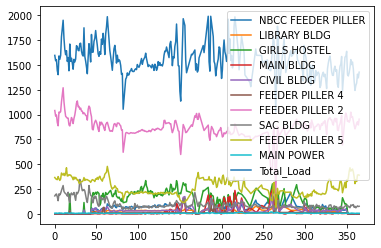

In [10]:
df.plot()

#Accessing the Important Part of Data

In [11]:
df2 = df.iloc[:][['Log Date / Time','Total_Load']]

In [12]:
x = np.array(df2['Total_Load'])
print(x)

[1596.99 1543.49 1554.5  1443.81 1402.66 1591.45 1557.29 1596.69 1784.1
 1951.24 1770.16 1656.75 1603.73 1644.14 1536.45 1575.19 1441.82 1711.31
 1536.72 1568.23 1520.52 1457.91 1557.59 1530.99 1559.82 1694.64 1685.27
 1648.17 1643.73 1715.69 1719.68 1639.89 1603.35 1590.14 1874.87 1586.6
 1539.53 1481.5  1412.26 1579.14 1715.   1629.03 1530.81 1807.69 1628.56
 1630.61 1737.62 1768.91 1847.45 1765.75 1695.67 1612.76 1587.29 1634.34
 1608.22 1761.79 1708.87 1819.12 1733.42 1605.52 1811.78 1882.43 1986.89
 1645.92 1585.95 1512.24 1446.66 1565.17 1663.08 1698.05 1630.54 1519.33
 1598.81 1533.95 1553.64 1542.08 1496.74 1405.53 1415.66 1054.53 1356.65
 1374.49 1420.54 1398.04 1402.35 1435.9  1443.09 1464.33 1436.83 1434.17
 1435.49 1454.14 1461.8  1453.74 1505.13 1483.37 1477.15 1498.9  1533.44
 1565.79 1507.14 1543.91 1563.31 1579.21 1619.06 1564.11 1524.02 1484.1
 1499.48 1493.35 1486.32 1471.59 1505.27 1490.66 1445.67 1508.17 1487.53
 1446.3  1469.24 1534.25 1497.21 1525.3  1495.42 1500.

In [13]:
df2['Total_Load'].mean()

1545.8311458333333

Text(0.5, 1.0, 'Energy Load Over the Years')

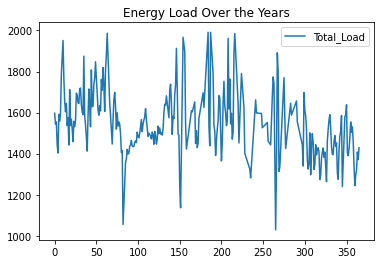

In [14]:
df2.plot()
pyplot.title("Energy Load Over the Years")

#Check for Stationarity

In [15]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df2['Total_Load'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-value : ",dftest[1])
print("3. No. of lags : ",dftest[2])
print("4. No. of observation used for ADF regression and critical value calculation : ",dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
  print("\t",key,":",val)

1. ADF :  -2.0362377371917355
2. P-value :  0.27091353345993424
3. No. of lags :  15
4. No. of observation used for ADF regression and critical value calculation :  272
5. Critical Values : 
	 1% : -3.4546223782586534
	 5% : -2.8722253212300277
	 10% : -2.5724638500216264


#Plotting ACF and PACF to get Correlations

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


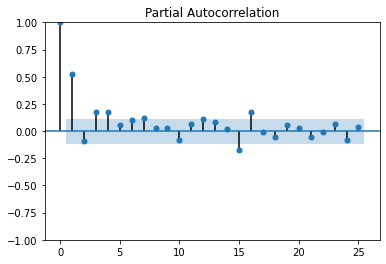

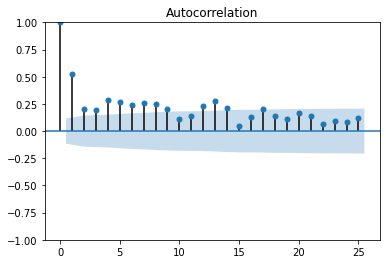

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf = plot_pacf(df2['Total_Load'],lags = 25)
acf = plot_acf(df2['Total_Load'],lags = 25)

#Splitting Data into Train and Test

In [17]:
xtrain = x[:len(x)-30]
xtest = x[len(x)-30:]

#Importing Library to Ignore Harmless Warnings

In [18]:
import warnings
warnings.filterwarnings("ignore")

#ARMA Model 

#Training ARMA Model on Training Set

In [19]:
model = AutoReg(xtrain,lags = 10).fit()

In [20]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  258
Model:                    AutoReg(10)   Log Likelihood               -1557.962
Method:               Conditional MLE   S.D. of innovations            129.434
Date:                Wed, 15 Feb 2023   AIC                           3139.925
Time:                        14:47:16   BIC                           3182.086
Sample:                            10   HQIC                          3156.897
                                  258                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        455.0490    138.687      3.281      0.001     183.228     726.870
y.L1           0.5084      0.063      8.116      0.000       0.386       0.631
y.L2          -0.2020      0.070     -2.874      0.0

In [21]:
print(len(xtrain))

258


#Testing ARMA Model

In [22]:
#Predicting the Future value

pred = model.predict(start = len(xtrain), end =len(x)-1, dynamic = False)
print(pred)

[1485.67765472 1532.93384033 1549.13392172 1532.84328884 1521.93639498
 1514.98472224 1509.25237121 1517.52110376 1532.2059131  1547.21518588
 1544.28178138 1537.14768263 1533.82846541 1536.31725318 1539.99022316
 1542.76883606 1545.7194405  1546.74454024 1546.19584884 1544.61135573
 1544.74387281 1546.3088471  1547.86865859 1548.56415204 1548.65496779
 1548.71637851 1548.67022454 1548.75339424 1549.04937387 1549.56577765]


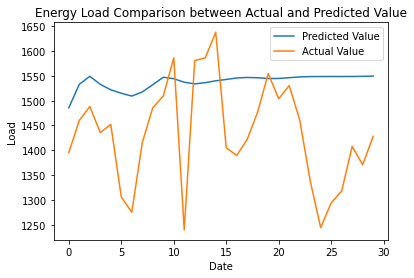

In [23]:
#Plotting the Predicted and actual values

pyplot.plot(pred, label="Predicted Value")
pyplot.plot(xtest, label="Actual Value")
pyplot.xlabel("Date")
pyplot.ylabel("Load")
pyplot.title("Energy Load Comparison between Actual and Predicted Value")
pyplot.legend(loc="best")

#Calculating Error in ARMA Model

In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(xtest,pred))

In [25]:
error_percent = (rmse/xtest.mean())*100

In [26]:
print("RMSE For ARMA Model is : ",rmse)
print("Error Percentage for ARMA Model is :",error_percent, "%")


RMSE For ARMA Model is :  146.38213211467308
Error Percentage for ARMA Model is : 10.212723517085239 %


#ARIMA Model

#Finding Best Order for ARIMA Model

In [27]:
df2['Total_Load']
stepwise_fit = auto_arima(df2['Total_Load'], trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3618.871, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3712.223, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3705.880, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3660.573, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3710.227, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3620.154, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3616.911, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3628.830, Time=0.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3668.270, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3618.840, Time=1.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3645.405, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3620.746, Time=1.70 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3615.217, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3627.503, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  288
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1803.609
Date:                Wed, 15 Feb 2023   AIC                           3615.217
Time:                        14:47:26   BIC                           3629.855
Sample:                             0   HQIC                          3621.084
                                - 288                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4004      0.060      6.645      0.000       0.282       0.519
ar.L2         -0.2449      0.055     -4.430      0.000      -0.353      -0.137
ma.L1         -0.8725      0.043    -20.493      0.000      -0.956      -0.789
sigma2      1.675e+04    930.873     17.994      0.000    1.49e+04    1.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               121.30
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.36   Skew:                             0.16
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Importing Libraries for ARIMA Model

In [28]:
from statsmodels.tsa.arima.model import ARIMA

#Training ARIMA Model on Traning Set

In [29]:
Amodel = ARIMA(xtrain, order = (2,1,1)).fit()

Amodel.summary

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x7f5f240f2be0>>

#Testing the ARIMA Model

In [30]:
#Predicting the Future Values

start = len(xtrain)
end = len(x)-1

new_pred = Amodel.predict(start = start, end = end, typ = 'levels')
print(new_pred)

[1429.91062923 1453.42669987 1453.87558837 1447.81964994 1445.30363304
 1445.91305967 1446.82122241 1447.0191399  1446.85674363 1446.74000114
 1446.73684064 1446.76653564 1446.77912713 1446.77623949 1446.77175879
 1446.77075072 1446.77153944 1446.77211885 1446.77213912 1446.77199355
 1446.77193056 1446.77194421 1446.77196632 1446.77197144 1446.77196762
 1446.77196474 1446.77196462 1446.77196533 1446.77196565 1446.77196558]


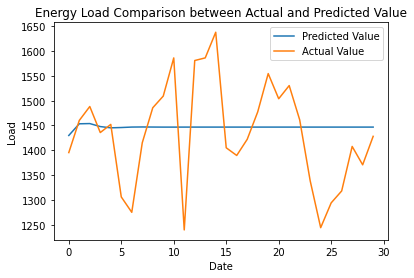

In [31]:
#Plotting the Predicted and Actual values

pyplot.plot(new_pred, label="Predicted Value")
pyplot.plot(xtest, label="Actual Value")
pyplot.xlabel("Date")
pyplot.ylabel("Load")
pyplot.title("Energy Load Comparison between Actual and Predicted Value")
pyplot.legend(loc="best")

#Calculating the Error Percentage for ARIMA Model

In [32]:
xtest.mean()

1433.3310000000004

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error

new_rmse = sqrt(mean_squared_error(xtest,new_pred))

In [34]:
print("The mean is : ",xtest.mean())
print("RMSE for ARIMA Model is : ",new_rmse)
print("Error Percentage for ARIMA Model is : ",(new_rmse/xtest.mean())*100, "%")

The mean is :  1433.3310000000004
RMSE for ARIMA Model is :  103.80655428445766
Error Percentage for ARIMA Model is :  7.242329530614885 %


#SARIMA Model

#Importing Libraries for the SARIMA Model

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

#Training SARIMA Model on Training Set

In [36]:
model_sarima = SARIMAX(xtrain, order=(2, 1, 2), seasonal_order=(0, 1, 1, 7))
model_sarima_fit = model_sarima.fit()

#Testing the SARIMA Model

In [37]:
#Predicting the Future Values

sarima_prediction = model_sarima_fit.forecast(steps=len(xtest))
print(sarima_prediction)

[1447.50864124 1452.85118827 1466.98461547 1452.07761642 1425.97874281
 1431.87130884 1430.16947159 1456.80123368 1444.21389223 1458.55077331
 1448.07460123 1423.34330034 1428.59439331 1426.35440279 1452.97023983
 1440.50884024 1454.88987892 1444.39716412 1419.64982043 1424.89981041
 1422.6633734  1449.28061552 1436.81880007 1451.19936362 1440.70659812
 1415.9593539  1421.20938804 1418.97294094 1445.59016907 1433.12835161]


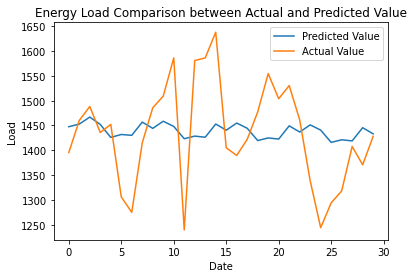

In [38]:
#Plotting the Predicted and Actual values

pyplot.plot(sarima_prediction, label="Predicted Value")
pyplot.plot(xtest, label="Actual Value")
pyplot.xlabel("Date")
pyplot.ylabel("Load")
pyplot.title("Energy Load Comparison between Actual and Predicted Value")
pyplot.legend(loc="best")

#Calculating the Error Percentage for SARIMA Model

In [39]:
sarima_rmse = sqrt(mean_squared_error(xtest,sarima_prediction))

In [40]:
print("RMSE for SARIMA Model is : ",sarima_rmse)
print("Error Percentage for SARIMA Model is : ",(sarima_rmse/xtest.mean())*100, "%")

RMSE for SARIMA Model is :  101.37448985962472
Error Percentage for SARIMA Model is :  7.07265034103251 %


#LSTM Model

#Making Scalar Object for Data to Fit it into the Model

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
xtrain = xtrain.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)

In [43]:
scaler.fit(xtrain)
scaled_train = scaler.transform(xtrain)
scaled_test = scaler.transform(xtest)

In [44]:
scaled_train[:10]

array([[0.59050883],
       [0.53495327],
       [0.54638629],
       [0.43144341],
       [0.38871236],
       [0.58475597],
       [0.54928349],
       [0.5901973 ],
       [0.78480789],
       [0.95836968]])

#Preprocessing the Data

In [45]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [46]:
# define generator
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [47]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.59050883 0.53495327 0.54638629 0.43144341 0.38871236 0.58475597
 0.54928349 0.5901973  0.78480789 0.95836968 0.77033229 0.6525649
 0.59750779 0.6394704  0.52764278 0.56787124 0.42937695 0.70922118
 0.52792316 0.56064382 0.51110073 0.44608515 0.54959502 0.521973
 0.5519107  0.6919107  0.68218069 0.64365524 0.63904465 0.71376947]
Predict this y: 
 [[0.71791277]]


In [48]:
X.shape

(1, 30, 1)

#Training the LSTM Model on Training Set

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [50]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [52]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
228/228 [==============================] - 12s 32ms/step - loss: 0.0374
Epoch 2/50
228/228 [==============================] - 5s 23ms/step - loss: 0.0261
Epoch 3/50
228/228 [==============================] - 5s 21ms/step - loss: 0.0269
Epoch 4/50
228/228 [==============================] - 3s 14ms/step - loss: 0.0245
Epoch 5/50
228/228 [==============================] - 3s 13ms/step - loss: 0.0256
Epoch 6/50
228/228 [==============================] - 5s 21ms/step - loss: 0.0244
Epoch 7/50
228/228 [==============================] - 3s 13ms/step - loss: 0.0245
Epoch 8/50
228/228 [==============================] - 3s 14ms/step - loss: 0.0246
Epoch 9/50
228/228 [==============================] - 4s 15ms/step - loss: 0.0243
Epoch 10/50
228/228 [==============================] - 4s 15ms/step - loss: 0.0244
Epoch 11/50
228/228 [==============================] - 3s 14ms/step - loss: 0.0239
Epoch 12/50
228/228 [==============================] - 3s 14ms/step - loss: 0.0237
Epoch 13/50


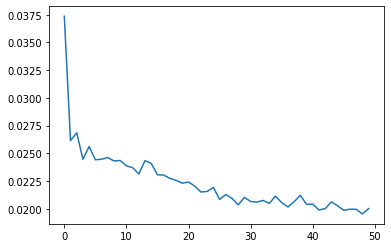

In [53]:
loss_per_epoch = model.history.history['loss']
pyplot.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [54]:
last_train_batch = scaled_train[-30:]

In [55]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [56]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 407ms/step


array([[0.45277232]], dtype=float32)

In [57]:
scaled_test[0]

array([0.38119418])

#Testing the LSTM Model

In [58]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(xtest)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 43ms/step


In [59]:
test_predictions

[array([0.45277232], dtype=float32),
 array([0.49091125], dtype=float32),
 array([0.49314618], dtype=float32),
 array([0.48689824], dtype=float32),
 array([0.48365927], dtype=float32),
 array([0.4814554], dtype=float32),
 array([0.47885257], dtype=float32),
 array([0.47645724], dtype=float32),
 array([0.47449964], dtype=float32),
 array([0.4728008], dtype=float32),
 array([0.4710167], dtype=float32),
 array([0.469428], dtype=float32),
 array([0.46841234], dtype=float32),
 array([0.46817565], dtype=float32),
 array([0.46834457], dtype=float32),
 array([0.46852958], dtype=float32),
 array([0.46860254], dtype=float32),
 array([0.46881914], dtype=float32),
 array([0.46961308], dtype=float32),
 array([0.47068578], dtype=float32),
 array([0.47197676], dtype=float32),
 array([0.47321594], dtype=float32),
 array([0.47411978], dtype=float32),
 array([0.47473884], dtype=float32),
 array([0.47507387], dtype=float32),
 array([0.47542208], dtype=float32),
 array([0.47627318], dtype=float32),
 array

In [60]:
xtest

array([[1395.42],
       [1460.16],
       [1488.25],
       [1435.79],
       [1452.21],
       [1306.1 ],
       [1275.08],
       [1415.14],
       [1485.69],
       [1509.24],
       [1586.12],
       [1239.61],
       [1580.9 ],
       [1586.19],
       [1637.87],
       [1405.08],
       [1389.62],
       [1422.16],
       [1477.37],
       [1554.58],
       [1503.89],
       [1530.4 ],
       [1461.4 ],
       [1338.57],
       [1244.13],
       [1294.11],
       [1318.12],
       [1407.79],
       [1370.79],
       [1428.15]])

In [61]:
true_predictions = scaler.inverse_transform(test_predictions)

In [62]:
Predictions = true_predictions
Predictions

array([[1464.3497435 ],
       [1501.07752927],
       [1503.22977241],
       [1497.21300842],
       [1494.09387453],
       [1491.97153641],
       [1489.46502496],
       [1487.15832038],
       [1485.27315606],
       [1483.63716199],
       [1481.91908695],
       [1480.38916673],
       [1479.41108312],
       [1479.18315061],
       [1479.34582015],
       [1479.52398749],
       [1479.5942442 ],
       [1479.80283316],
       [1480.56739147],
       [1481.60040619],
       [1482.84361704],
       [1484.03694792],
       [1484.9073505 ],
       [1485.50349935],
       [1485.82614066],
       [1486.16146721],
       [1486.98107143],
       [1488.21062125],
       [1489.32887389],
       [1490.11667891]])

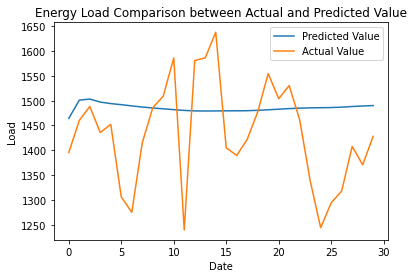

In [63]:
#Plotting the Predicted and Actual values

pyplot.plot(Predictions, label="Predicted Value")
pyplot.plot(xtest, label="Actual Value")
pyplot.xlabel("Date")
pyplot.ylabel("Load")
pyplot.title("Energy Load Comparison between Actual and Predicted Value")
pyplot.legend(loc="best")

#Calculating the Error Percentage for LSTM Model

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
LSTM_rmse=sqrt(mean_squared_error(xtest,Predictions))
print(rmse)

146.38213211467308


In [65]:
print("RMSE for LSTM Model is : ",LSTM_rmse)
print("Error Percentage for LSTM Model is : ",(LSTM_rmse/xtest.mean())*100, "%")

RMSE for LSTM Model is :  116.82546841424819
Error Percentage for LSTM Model is :  8.15062734387578 %
